In [30]:

import math
import pandas as pd
import numpy as np

import warnings
import warnings
warnings.filterwarnings('ignore')  

# Setting display options for pandas DataFrame
pd.set_option('display.max_columns', None)  # Displaying all columns of a DataFrame
pd.set_option('display.expand_frame_repr', False)  # Disabling frame expansion
pd.set_option('max_colwidth', -1)  # Setting the maximum width of the columns to display to unlimited (-1)

In [31]:
%cd C:\Users\Harshali\Downloads\ipl_csv_new

C:\Users\Harshali\Downloads\ipl_csv_new


In [32]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 46C4-FBCE

 Directory of C:\Users\Harshali\Downloads\ipl_csv_new

04/27/2024  12:49 PM    <DIR>          .
04/28/2024  12:30 PM    <DIR>          ..
04/27/2024  12:48 PM            33,690 335982.csv
04/27/2024  12:48 PM             2,666 335982_info.csv
04/27/2024  12:48 PM            39,538 335983.csv
04/27/2024  12:48 PM             2,552 335983_info.csv
04/27/2024  12:48 PM            27,883 335984.csv
04/27/2024  12:48 PM             2,386 335984_info.csv
04/27/2024  12:48 PM            34,233 335985.csv
04/27/2024  12:48 PM             2,599 335985_info.csv
04/27/2024  12:48 PM            31,339 335986.csv
04/27/2024  12:48 PM             2,530 335986_info.csv
04/27/2024  12:48 PM            32,226 335987.csv
04/27/2024  12:48 PM             2,480 335987_info.csv
04/27/2024  12:48 PM            32,052 335988.csv
04/27/2024  12:48 PM             2,513 335988_info.csv
04/27/2024  12:48 PM            37,660 335989.csv
04/27/20

In [33]:
df=pd.read_csv('all_matches.csv')

In [34]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [36]:
# Rename  'striker' to 'batsman'
df.rename(columns = {'striker':'batsman'},inplace=True)

# Rename 'runs_off_bat' column to 'batsman_runs'
df.rename(columns={'runs_off_bat': 'batsman_runs'}, inplace=True)

## [ Problem Statement:  ]

### How good is player X against  CSK in 'MA Chidambaram Stadium, Chepauk'  when they’re playing 3 spinners?

- Filters in our problem statement:
- Stadium = 'MA Chidambaram Stadium, Chepauk'
- Phase = 'Middle Overs'
- Oppostion Team = 'Chennai Super Kings'

In [37]:
def phase(ball):
    if ball <= 5.6:
        return 'Powerplay'
    elif ball <= 14.6:
        return 'Middle'
    else:
        return 'Death'

In [38]:
df['phase'] = df['ball'].apply(lambda x: phase(x))

In [39]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'phase'],
      dtype='object')

In [40]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1

def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1
    
def ByCustom(df, current_venue, current_phase, current_opposition):
    
    df = df[df.venue == current_venue]
    df = df[df.phase == current_phase]
    df = df[df.bowling_team == current_opposition]
    
    df.reset_index(inplace = True, drop = True)
    
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman', 'match_id'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
    
    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    
    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    
    df['dot_percentage'] = df.apply(lambda x: x['dots']/x['balls'], axis = 1)
    
    return df

In [41]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [42]:
df1 = ByCustom(df,'MA Chidambaram Stadium, Chepauk', 'Middle', 'Chennai Super Kings')

In [43]:
df1

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,dot_percentage
0,A Mishra,1,14,16,1,9,4,1,0,2,0,87.500000,14.000000,16.0,8.000000,0.562500
1,A Mithun,1,11,8,1,3,3,0,0,2,0,137.500000,11.000000,8.0,4.000000,0.375000
2,A Symonds,1,26,26,0,12,10,1,0,2,1,100.000000,26.000000,26.0,8.666667,0.461538
3,AB Agarkar,1,6,2,0,0,0,1,0,1,0,300.000000,6.000000,2.0,2.000000,0.000000
4,AB de Villiers,4,88,61,1,17,26,5,2,10,1,144.262295,22.000000,61.0,5.545455,0.278689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Y Nagar,1,19,26,0,8,17,1,0,0,0,73.076923,19.000000,26.0,26.000000,0.307692
111,Y Venugopal Rao,3,67,51,1,16,27,1,0,2,5,131.372549,22.333333,51.0,7.285714,0.313725
112,YK Pathan,4,29,35,1,16,15,2,0,1,1,82.857143,7.250000,35.0,17.500000,0.457143
113,Yuvraj Singh,4,66,58,2,22,24,5,0,5,2,113.793103,16.500000,29.0,8.285714,0.379310


In [44]:
df1['innings'].unique()

array([1, 4, 2, 3, 5, 7], dtype=int64)

In [45]:
filterred_df_costom=df1[df1['innings']>= 2]

In [46]:
filterred_df_costom

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,dot_percentage
4,AB de Villiers,4,88,61,1,17,26,5,2,10,1,144.262295,22.000000,61.000000,5.545455,0.278689
6,AD Mathews,2,42,36,0,12,18,2,0,2,2,116.666667,21.000000,36.000000,9.000000,0.333333
9,AL Menaria,2,22,30,1,14,12,3,0,1,0,73.333333,11.000000,30.000000,30.000000,0.466667
13,AT Rayudu,4,26,37,2,12,24,1,0,0,0,70.270270,6.500000,18.500000,37.000000,0.324324
22,CL White,2,40,38,1,14,18,1,0,5,0,105.263158,20.000000,38.000000,7.600000,0.368421
24,DA Miller,3,38,32,1,8,18,3,0,2,1,118.750000,12.666667,32.000000,10.666667,0.250000
25,DA Warner,3,72,73,2,28,32,9,0,1,3,98.630137,24.000000,36.500000,18.250000,0.383562
27,DJ Bravo,2,26,20,2,7,9,0,1,2,1,130.000000,13.000000,10.000000,6.666667,0.350000
29,DJ Hussey,2,22,17,2,7,6,1,0,2,1,129.411765,11.000000,8.500000,5.666667,0.411765
32,DPMD Jayawardene,3,36,35,3,13,16,4,0,0,2,102.857143,12.000000,11.666667,17.500000,0.371429


In [47]:
wt_sr, wt_rpi, wt_bpd, wt_dot_percentage = 0.13, 0.27, 0.16, 0.45

### Calculation - Normalizing all values to same dimensions

In [48]:
# Step 1: Square of all values
filterred_df_costom['calc_SR'] = filterred_df_costom['SR'].apply(lambda x: x*x) 
filterred_df_costom['calc_RPI'] = filterred_df_costom['RPI'].apply(lambda x: x*x) 
filterred_df_costom['calc_BPD'] = filterred_df_costom['BPD'].apply(lambda x: x*x) 
filterred_df_costom['calc_dot_percentage'] = filterred_df_costom['dot_percentage'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_dot_percentage = np.sqrt(filterred_df_costom[['calc_SR','calc_RPI', 'calc_BPD', 'calc_dot_percentage']].sum(axis=0))

filterred_df_costom['calc_SR'] = filterred_df_costom['calc_SR'].apply(lambda x: x/sq_sr) 
filterred_df_costom['calc_RPI'] = filterred_df_costom['calc_RPI'].apply(lambda x: x/sq_rpi) 
filterred_df_costom['calc_BPD'] = filterred_df_costom['calc_BPD'].apply(lambda x: x/sq_bpd) 
filterred_df_costom['calc_dot_percentage'] = filterred_df_costom['calc_dot_percentage'].apply(lambda x: x/sq_dot_percentage)

filterred_df_costom['calc_SR'] = filterred_df_costom['calc_SR'].apply(lambda x: x*wt_sr) 
filterred_df_costom['calc_RPI'] = filterred_df_costom['calc_RPI'].apply(lambda x: x*wt_rpi) 
filterred_df_costom['calc_BPD'] = filterred_df_costom['calc_BPD'].apply(lambda x: x*wt_bpd) 
filterred_df_costom['calc_dot_percentage'] = filterred_df_costom['calc_dot_percentage'].apply(lambda x: x*wt_dot_percentage)

best_sr, worst_sr = max(filterred_df_costom['calc_SR']), min(filterred_df_costom['calc_SR'])
best_rpi, worst_rpi = max(filterred_df_costom['calc_RPI']), min(filterred_df_costom['calc_RPI'])
best_bpd, worst_bpd = max(filterred_df_costom['calc_BPD']), min(filterred_df_costom['calc_BPD'])
best_dot_percentage, worst_dot_percentage = min(filterred_df_costom['calc_dot_percentage']), max(filterred_df_costom['calc_dot_percentage'])

In [49]:
filterred_df_costom.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,dot_percentage,calc_SR,calc_RPI,calc_BPD,calc_dot_percentage
4,AB de Villiers,4,88,61,1,17,26,5,2,10,1,144.262295,22.0,61.0,5.545455,0.278689,3.936540,1.232133,2.922988,0.013834
6,AD Mathews,2,42,36,0,12,18,2,0,2,2,116.666667,21.0,36.0,9.000000,0.333333,2.574558,1.122667,1.018058,0.019791
9,AL Menaria,2,22,30,1,14,12,3,0,1,0,73.333333,11.0,30.0,30.000000,0.466667,1.017213,0.308033,0.706985,0.038790
13,AT Rayudu,4,26,37,2,12,24,1,0,0,0,70.270270,6.5,18.5,37.000000,0.324324,0.934012,0.107557,0.268851,0.018735
22,CL White,2,40,38,1,14,18,1,0,5,0,105.263158,20.0,38.0,7.600000,0.368421,2.095858,1.018292,1.134317,0.024177


###  Calculation - Comparision against the best & worst values

In [50]:
# Deviation from the best values
filterred_df_costom['dev_best_SR'] = filterred_df_costom['calc_SR'].apply(lambda x: (x - best_sr) * (x - best_sr)) 
filterred_df_costom['dev_best_RPI'] = filterred_df_costom['calc_RPI'].apply(lambda x: (x - best_rpi) * (x - best_rpi)) 
filterred_df_costom['dev_best_BPD'] = filterred_df_costom['calc_BPD'].apply(lambda x: (x - best_bpd) * (x - best_bpd)) 
filterred_df_costom['dev_best_dot_percentage'] = filterred_df_costom['calc_dot_percentage'].apply(lambda x: (x - best_dot_percentage) * (x - best_dot_percentage))

# Total deviation from the best values
filterred_df_costom['dev_best_sqrt'] = filterred_df_costom.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_dot_percentage'], axis=1) 

# Deviation from the worst values
filterred_df_costom['dev_worst_SR'] = filterred_df_costom['calc_SR'].apply(lambda x: (x - worst_sr) * (x - worst_sr)) 
filterred_df_costom['dev_worst_RPI'] = filterred_df_costom['calc_RPI'].apply(lambda x: (x - worst_rpi) * (x - worst_rpi)) 
filterred_df_costom['dev_worst_BPD'] = filterred_df_costom['calc_BPD'].apply(lambda x: (x - worst_bpd) * (x - worst_bpd)) 
filterred_df_costom['dev_worst_dot_percentage'] = filterred_df_costom['calc_dot_percentage'].apply(lambda x: (x - worst_dot_percentage) * (x - worst_dot_percentage))

# Total deviation from the worst values
filterred_df_costom['dev_worst_sqrt'] = filterred_df_costom.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_dot_percentage'], axis=1)

### Final Step - Overall score for each player ( values from 0 - 1)

In [51]:
filterred_df_costom['score'] = filterred_df_costom.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [52]:
filterred_df_costom.head(2)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,dot_percentage,calc_SR,calc_RPI,calc_BPD,calc_dot_percentage,dev_best_SR,dev_best_RPI,dev_best_BPD,dev_best_dot_percentage,dev_best_sqrt,dev_worst_SR,dev_worst_RPI,dev_worst_BPD,dev_worst_dot_percentage,dev_worst_sqrt,score
4,AB de Villiers,4,88,61,1,17,26,5,2,10,1,144.262295,22.0,61.0,5.545455,0.278689,3.936540,1.232133,2.922988,0.013834,9.482933,3.338908,2.237014,0.000060,15.058915,14.255385,1.511885,8.525502,0.005705,24.298477,0.617380
6,AD Mathews,2,42,36,0,12,18,2,0,2,2,116.666667,21.0,36.0,9.000000,0.333333,2.574558,1.122667,1.018058,0.019791,19.726210,3.750940,11.564051,0.000187,35.041389,5.825695,1.254671,1.030054,0.004841,8.115261,0.188042


In [53]:
filterred_df_costom[['batsman', 'score']].sort_values(by='score', ascending=False).reset_index().drop(columns=['index'])


,batsman,score
0,SE Marsh,0.931495
1,SR Watson,0.717881
2,AB de Villiers,0.617380
3,G Gambhir,0.577196
4,NV Ojha,0.448379
5,Y Venugopal Rao,0.401966
6,MS Bisla,0.388796
7,V Kohli,0.203129
8,DJ Bravo,0.189141
9,AD Mathews,0.188042


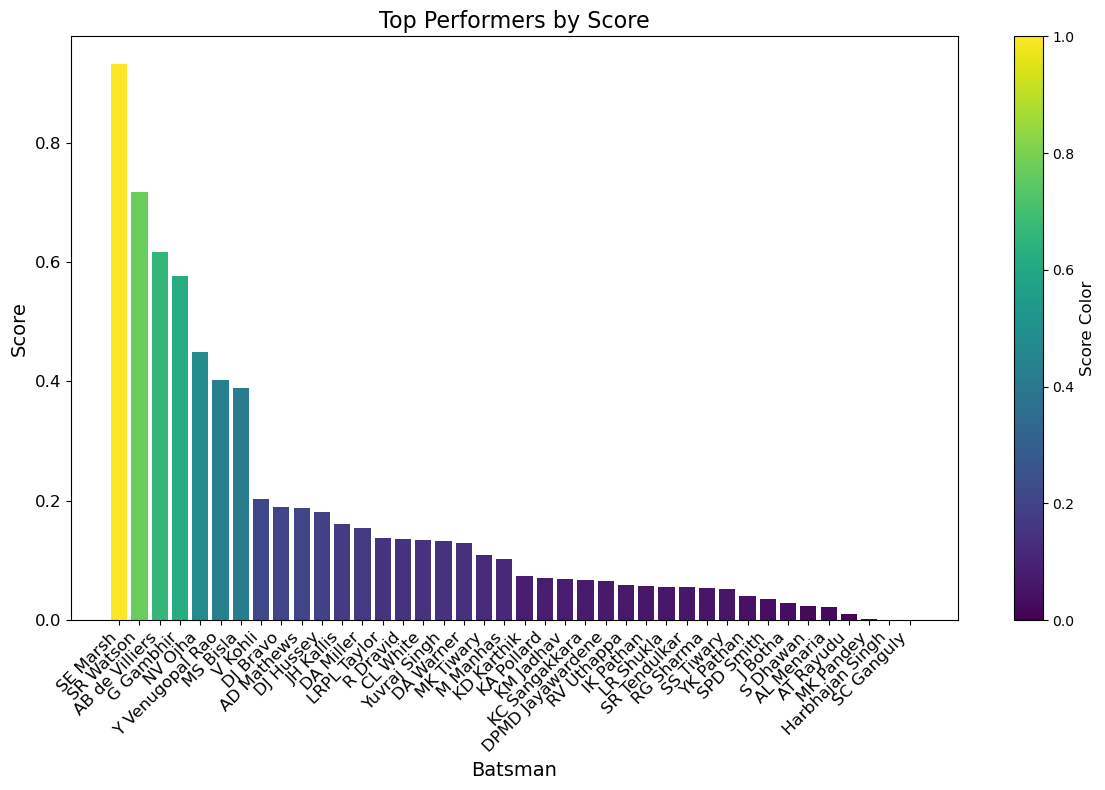

In [59]:


# Assuming filterred_df_costom is your DataFrame containing batsman and score columns
sorted_df = filterred_df_costom[['batsman', 'score']].sort_values(by='score', ascending=False).reset_index(drop=True)

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_df['batsman'], sorted_df['score'], color=plt.cm.viridis(sorted_df['score']/max(sorted_df['score'])))  # Using Viridis color map for color variation
plt.title('Top Performers by Score', fontsize=16)
plt.xlabel('Batsman', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add color bar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=plt.gca())
cbar.set_label('Score Color', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


## [Observations]

### The plot highlights the top performers against CSK at the MA Chidambaram Stadium, Chepauk, during the middle overs, particularly when facing three spinners. SE Marsh emerges as the standout performer, followed by SR Watson and AB de Villiers. The color gradient effectively distinguishes between the scores, with darker shades indicating higher performance levels. This analysis sheds light on the effectiveness of batsmen in navigating the challenges posed by CSK's spinners in the middle overs at the iconic Chepauk stadium.

------------------------------------------------------------------------------------------------------------------------------